### DataSet

- Íµ¨Í∏Ä ÌîåÎ†àÏù¥ ÎÇ¥ ÎØ∏ÏÜå Ïù¥Ïö©Ïûê Î¶¨Î∑∞ 5200Í±¥
- ÏàòÏßë Í∏∞Í∞Ñ: 2019-09 ~ 2020.08
- Ïª¨Îüº:
    - customer_id
    - date: Î¶¨Î∑∞ ÎÇ®Í∏¥ ÎÇ†Ïßú
    - rating: ÌèâÏ†ê
    - real_review: Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞

In [1]:
df_miso_reviews_final = pd.read_csv("./df_miso_reviews_final.csv", index_col=0)

In [110]:
#df_miso_reviews_final

In [3]:
df_miso_reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  5200 non-null   object
 1   date         5200 non-null   object
 2   rating       5200 non-null   int64 
 3   real_review  5200 non-null   object
 4   response     5200 non-null   object
dtypes: int64(1), object(4)
memory usage: 243.8+ KB


In [4]:
# date: object -> type function

def time_format(t):
    

    import datetime
    
    datetimed_style = datetime.datetime.strptime(t, '%YÎÖÑ %mÏõî %dÏùº')
    
    return datetimed_style


In [5]:
df_miso_reviews_final['date(clean)'] = df_miso_reviews_final['date'].apply(time_format)

In [111]:
#df_miso_reviews_final

In [19]:
# service progress by year, month, day

df_miso_reviews_final['year'] = [date.year for date in df_miso_reviews_final['date(clean)']]
df_miso_reviews_final['month'] = [date.month for date in df_miso_reviews_final['date(clean)']]
df_miso_reviews_final['day'] = [date.day for date in df_miso_reviews_final['date(clean)']]
df_miso_reviews_final['weekday'] = [date.strftime('%A') for date in df_miso_reviews_final['date(clean)']]

In [9]:
df_miso_reviews_final['month'].unique()

array([ 8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9], dtype=int64)

In [12]:
df_sorted_month = df_miso_reviews_final.groupby(by='month').agg({'customer_id': 'count'}).sort_values('customer_id', ascending = False).reset_index()
df_sorted_month['count'] = df_sorted_month['customer_id']

In [14]:
df_sorted_month_fin = df_sorted_month[['month', 'count']]
df_sorted_month_fin

month  count
0      10    616
1       9    539
2       8    537
3      11    512
4       7    485
5       6    405
6       1    386
7       5    365
8      12    357
9       4    341
10      3    337
11      2    320

Text(0.5, 1.0, 'Serivce Frequency by month')

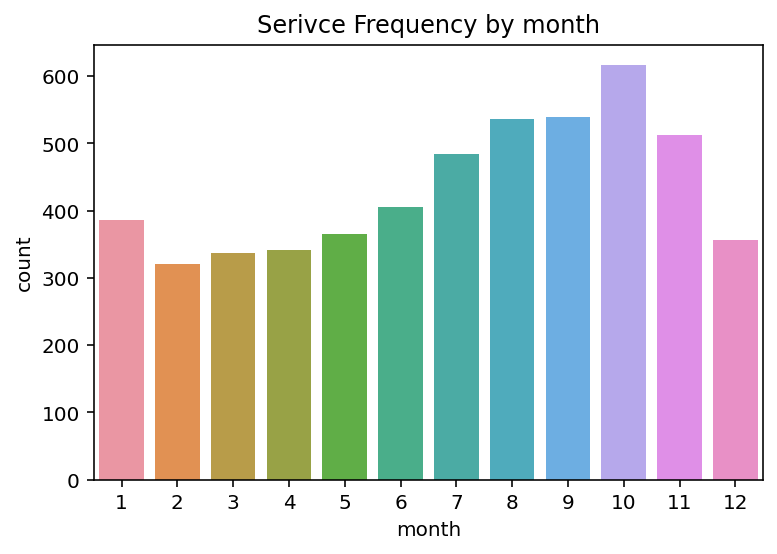

In [17]:
import seaborn as sns

sns.barplot(x = 'month', y='count', data=df_sorted_month_fin).set_title('Serivce Frequency by month')

#### ÏÑúÎπÑÏä§ÎüâÏù¥ Í∞ÄÏû• ÎßéÏùÄ Îã¨ÏùÄ 10Ïõî, Ï£ºÎ°ú Í∞ÄÏùÑÏóê ÏÑúÎπÑÏä§ Ïù¥Ïö©

#### ÏΩîÎ°úÎÇò19ÏôÄ Í¥ÄÎ†®Ìï¥ÏÑú Ï≤´ Íµ≠ÎÇ¥ ÌôïÏßÑÏûê Î∞úÏÉù(1/20) Ï†ÑÍπåÏßÑ ÏÑúÎπÑÏä§ Ïù¥Ïö©Î•†Ïù¥ 386Í±¥ -> 320Í±¥ÏúºÎ°ú 76Í±¥ Ï§ÑÏñ¥Îì† ÌõÑ 6ÏõîÍπåÏßÄ Ïù¥Ïñ¥Ïßê  

#### ÏΩîÎ°úÎÇòÍ∞Ä Ïû†Ïû†Ìï¥ÏßÑ 6ÏõîÎ∂ÄÌÑ∞Îäî 400Í±¥ÏùÑ ÎÑòÍ∏∞Î©¥ÏÑú 8ÏõîÍπåÏßÄ 537Í±¥ÏúºÎ°ú Ï¶ùÍ∞Ä. 9ÏõîÎ∂ÄÌÑ∞Îäî Ï∂îÏù¥Î•º ÏßÄÏºúÎ¥êÏïº Ìï† Í≤É Í∞ôÏùå

In [41]:
df_sorted_weekday = df_miso_reviews_final.groupby('weekday').agg({'customer_id': 'count'}).sort_values('customer_id', ascending = False).reset_index()
df_sorted_weekday['count'] = df_sorted_weekday['customer_id']
df_sorted_weekday2 = df_sorted_weekday[['weekday', 'count']]
df_sorted_weekday2

weekday  count
0  Wednesday    864
1   Thursday    802
2     Monday    761
3    Tuesday    756
4     Friday    743
5   Saturday    687
6     Sunday    587

In [45]:
# seaborn type
print('Seaborn version : ', sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.10.1


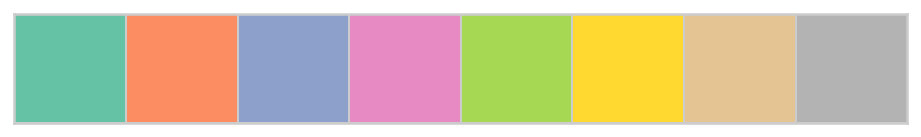

In [46]:
current_palatte = sns.color_palette('Set2')
sns.palplot(current_palatte)

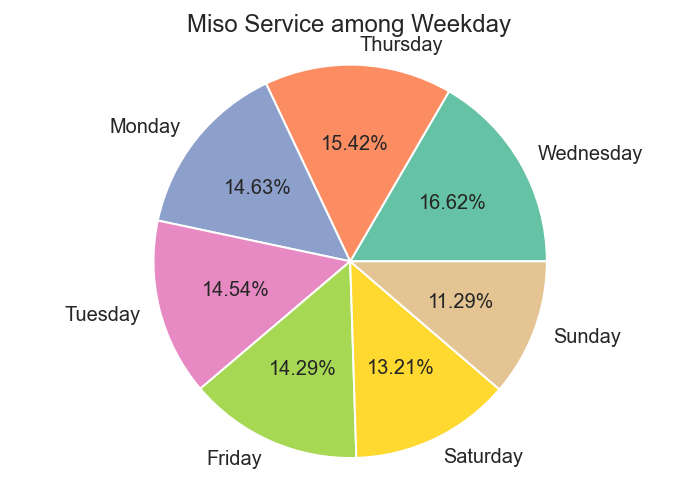

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt



group_colors = current_palatte


plt.pie(df_sorted_weekday2['count'],
       labels = df_sorted_weekday2['weekday'],
       colors = group_colors,
       autopct = '%1.2f%%',
       textprops = {'fontsize': 10})

plt.axis('equal')
plt.title('Miso Service among Weekday')
plt.show()

#### ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú Ï£ºÎßêÎ≥¥Îã§Îäî ÌèâÏùºÏóê ÏÑúÎπÑÏä§Î•º ÎßéÏù¥ Ïù¥Ïö©ÌïúÎã§

In [51]:
df_miso_ratings = df_miso_reviews_final.groupby('rating').agg({'customer_id': 'count'}).sort_values('customer_id', ascending=False).reset_index()
df_miso_ratings['count'] = df_miso_ratings['customer_id']
df_miso_ratings2 = df_miso_ratings[['rating', 'count']]
df_miso_ratings2

rating  count
0       5   4737
1       1    336
2       4     69
3       2     30
4       3     28

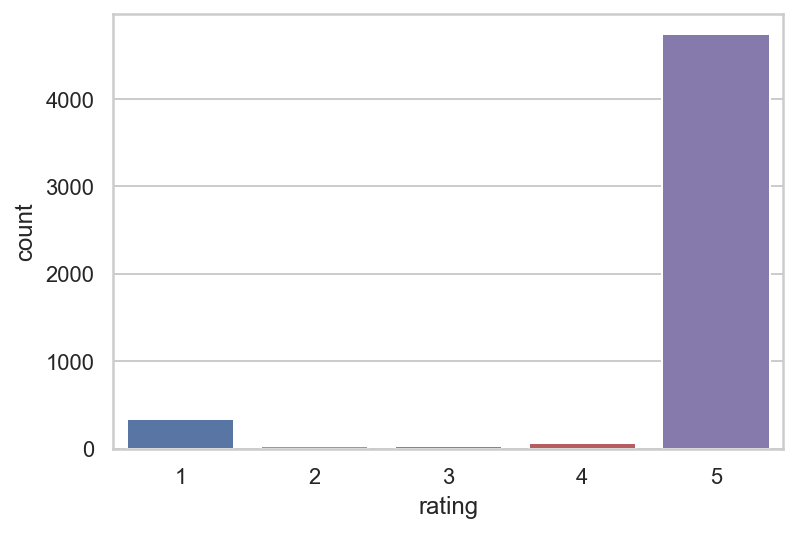

In [52]:
sns.barplot(x='rating', y='count', data=df_miso_ratings2)

#### 5Ï†êÍ≥º Í∑∏ Ïô∏Ïùò Ï†êÏàò ÎπÑÏú®Ïù¥ ÎÑàÎ¨¥ Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇ® -> 1Ï†êÏùÑ vs 5Ï†êÏùÑ ÌôÄÎ°ú

In [89]:
high_rate_review = df_miso_reviews_final[df_miso_reviews_final['rating'] == 5]['real_review']
low_rate_review = df_miso_reviews_final[df_miso_reviews_final['rating'] == 1]['real_review']

In [90]:
len(high_rate_review), len(low_rate_review)

(4737, 336)

In [91]:
low_rate_review[:10]

0      Î∞©Î¨∏Í≤¨Ï†Å ÏòàÏïΩÌñàÎäîÎç∞ Ïò®Îã§Îäî ÎßêÎèÑ ÏóÜÍ≥† ÏòàÏïΩ ÏãúÍ∞ÑÏùÄ Îã§Í∞ÄÏò§ÎäîÎç∞ ÏßëÏóê ÏûàÎäîÏßÄ Ïñ∏Ï†ú ÎèÑÏ∞©...
14     Ïù¥ÏÉÅÌïú ÏïÑÏ§åÎßàÎì§ ÏßÑÏßú ÎßéÎÑ§Ïöî ÏßÅÏõê Í¥ÄÎ¶¨Ï¢Ä ÌïòÏÑ∏Ïöî Ï≤≠ÏÜå ÏïàÏì∞ÎäêÎãàÎßå Î™ªÌïú Ïù¥ÏÉÅÌïú ÌÅ¥Î¶¨ÎÑà...
27     ÏµúÏïÖ ÌäπÌûà Ï∂©Î∂ÅÏ™ΩÏùÄ Ïã†Ï≤≠ÌïòÏßÄÎßàÏÑ∏Ïöî. Ï≤≠ÏÜåÎèÑÍµ¨ Îã§ Í∞îÎã§ÎÜìÏïòÎäîÎç∞ Ï≤≠ÏÜåÎèÑÍµ¨ÎèÑ Î™ªÏ∞æÍ≥†......
39     üö´ Ï†ïÎßê ÏµúÏïÖÏùò Ïñ¥ÌîåÏûÖÎãàÎã§ üö´ Ïïà Ï¢ãÏùÄ Ï†ê ÌïòÎÇòÌïòÎÇò ÎßêÏîÄÎìúÎ¶¨ÏûêÎ©¥ Ï≤≠ÏÜåÎèÑÍµ¨Ìï® Ï§ÄÎπÑÌïú ...
42                 Ïã§ÏãúÍ∞ÑÏùëÎãµÎèÑÏù¥ÌãÄÏß∏ ÏóÜÍ≥†ÏÉÅÏÑ∏Í≤¨Ï†ÅÎèÑÏóÜÍ≥†ÏóÖÏ≤¥Ïó∞ÎùΩÏ≤òÎèÑÏóÜÍ≥†Ïñ¥ÎñªÍ≤åÏã†Ï≤≠ÌïòÎûÄÍ±∞Ï£†?
43                       ÏòàÏïΩÏ∑®ÏÜåÎ•º Ï†ïÎßê ÏùºÏ∞çÎèÑ ÎßêÌï¥Ï§å ÏùºÏ†ïÍ¥ÄÎ¶¨ÎèÑ ÏïàÎê©ÎãàÍπå Ïó¨Í∏∞Îäî
50     Ï∑®ÏÜå ÏûòÎàåÎ•¥ÏÑ∏Ïöî :) CSÍµêÏú°Ï¢Ä ÏãúÌÇ§Í≥†Ïöî Í∑∏Îî¥ ÎßàÏù∏ÎìúÎ°ú Î≠ò Ï≤≠ÏÜåÌï©ÎãàÎã§. ÎßàÏù∏ÎìúÍ∞Ä Îìú...
55     ÏòàÏ†ÑÏóê ÎØ∏ÏÜåÎ•º ÌïúÎ≤à Ïù¥Ïö©ÌïòÍ≥† ÎßåÏ°±Ïä§Îü¨ÏõåÏÑú Ïù¥Î≤àÏóêÎäî Ïù¥ÏÇ¨Í≤¨Ï†ÅÎèÑ Î¨∏ÏùòÎìúÎ†∏ÎäîÎç∞ Î™®Îì† Î∂àÌé∏...
132    Í∞ú

In [92]:
import re

# ÌïúÍ∏ÄÍ≥º ÏòÅÎ¨∏Îßå Í∞ÄÎä•Ìïú Í≤ÉÏúºÎ°ú(^ = not)
high_rate_review = high_rate_review.apply(lambda x:re.sub('[^Í∞Ä-Ìû£\s\d]',"",x))
low_rate_review = low_rate_review.apply(lambda x:re.sub('[^Í∞Ä-Ìû£\s\d]',"",x))

In [93]:
high_rate_review[:10]

1                            Í∏àÏï°ÎèÑ Ìï©ÎãπÌïòÍ≥† Ï≤≠ÏÜåÎèÑ ÎîîÌÖåÏùºÏûàÍ≤å Ïûò Ìï¥Ï£ºÏãúÎÑ§Ïöî
2                              Ï†ÑÎ¨∏Í∞Ä Î∂ÑÎì§Ïù¥Îùº ÌÄÑÎ¶¨Ìã∞ ÎÜíÍ≤å Ï≤≠ÏÜå Ìï¥Ï£ºÏãúÎÑ§Ïöî
3               Ï†ïÍ∏∞Ï†ÅÏúºÎ°ú Ïù¥Ïö©Ï§ëÏûÖÎãàÎã§  Ï≤≠ÏÜå Í¥ÄÎ†® ÏóÖÏ≤¥Ï§ë Ï†úÏùº ÍπîÎÅîÌïòÍ≤åÏûò Ìï¥Ï£ºÏãúÎÑ§Ïöî 
4     Í∏âÌïòÍ≤å Ï≤≠ÏÜå Ïù¥Ïö©Î∞õÏïÑÎ≥∏Í±¥Îç∞Ïöî ÎßàÏùåÏóê Îì§Í≤å Ïûò Ìï¥Ï£ºÏÖîÏÑú Ï†ïÍ∏∞Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©Ìï¥Î≥ºÍπå Í≥†Î†§ Ìïò...
5                             Ï¢ãÏùÄ ÏÑúÎπÑÏä§Îùº ÏúóÏßë ÏïÑÎû´Ïßë Îã§ Ï∂îÏ≤ú Ìï¥Ï§¨ÏäµÎãàÎã§
6                     Ïù¥Ï†ïÎèÑ Í∏àÏï°Ïóê Ïù¥Ï†ïÎèÑ ÏÑúÎπÑÏä§Î•º Ìï¥Ï£ºÏãúÎã§Îãà Í∞ÄÏÑ±ÎπÑ Ï†ïÎßê Ï¢ãÎÑ§Ïöî
7             Ïä§ÏºÄÏ§Ñ Ï†ïÌïòÍ∏∞ÎèÑ Ìé∏ÌïòÍ≥†  Í∏àÏï°ÎèÑ Ïù¥Ï†ïÎèÑÎ©¥ Ï†ÄÎ†¥ÌïúÌé∏Ïù¥Îùº ÏûêÏ£º ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏñ¥Ïöî
8     Ïù¥Í±∞ Ïù¥Ïö©ÌïòÎãàÍπå  ÎùºÏù¥ÌîÑÍ∞Ä Îã¨ÎùºÏßÄÎÑ§Ïöî Ï£ºÎßêÏóê ÏãúÍ∞ÑÎèÑ ÎßéÏù¥ ÏÉùÍ∏∞Í≥†  Îòê Ï≤≠ÏÜå Ïã†Í≤ΩÏùÑ ...
9                     Ï≤≠ÏÜå Îß°Í∏∞Ïã§Í±∞Î©¥ Ïù¥Í±∞ Ïù¥Ïö©Ìï¥Î≥¥ÏÑ∏Ïöî  Ï≤≠ÏÜå Ï†ïÎßê Ïûò Ìï¥Ï£ºÏãúÎÑ§Ïöî
10    ÎßûÎ≤åÏù

In [122]:
low_rate_review[14]

'Ïù¥ÏÉÅÌïú ÏïÑÏ§åÎßàÎì§ ÏßÑÏßú ÎßéÎÑ§Ïöî ÏßÅÏõê Í¥ÄÎ¶¨Ï¢Ä ÌïòÏÑ∏Ïöî Ï≤≠ÏÜå ÏïàÏì∞ÎäêÎãàÎßå Î™ªÌïú Ïù¥ÏÉÅÌïú ÌÅ¥Î¶¨ÎÑàÎèÑ ÎßéÏù¥Ïò¥ Ï±ÑÌåÖÏãúÏä§ÌÖúÎïåÎ¨∏Ïóê ÏöîÏùº Î≥ÄÍ≤ΩÎèÑ Ï†úÎåÄÎ°ú ÏïàÎêòÎçòÎç∞ 5Ï≤úÏõê Ìï†Ïù∏Ïø†Ìè∞ÏúºÎ°ú ÎïåÏö∞Í≥†  Ïã¨ÏßÄÏñ¥ ÏΩúÏÑºÌÑ∞ ÏóêÏñ¥Ïª®ÎèÑ ÏïàÌãÄÏñ¥Ï£ºÎäîÏßÄ ÏΩúÏßÅÏõêÏù¥ ÎÇòÌïúÌÖå ÏßúÏ¶ùÎ∂ÄÎ¶º ÏùºÎÖÑÎÑòÍ≤å ÏÇ¨Ïö©Ï§ëÏù¥ÏóàÎäîÎç∞ ÌïòÎèÑ Ïù¥ÏÉÅÌïú ÏÇ¨Îûå ÎßéÏù¥Ïò§Í≥† ÏôÄÏÑú ÎßêÎì§ÎèÑ ÏôúÏù¥Î†áÍ≤å ÎßéÏùÄÏßÄ Ï§ëÍµ≠ÏïÑÏ§åÎßàÎì§ Ï≤≠ÏÜåÌïòÍ∏∞ Ïã´ÏùÄÍ∞ÄÎ¥ÑÏ≤≠ÏÜåÎ≥¥Îã§ Ïä§Ìä∏Î†àÏä§Î•º Îçî ÎßéÏù¥ Î∞õÏïÑÏÑú ÏöîÏ¶ò Í∞àÏïÑÌÉàÍπå ÏÉùÍ∞ÅÏ§ë Î≥Ñ ÌïúÍ∞úÎèÑ ÏïÑÍπùÎã§'

In [95]:
#!pip install konlpy
#!pip install wordcloud
#!pip install image
#!pip install wordcloud

In [96]:
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [97]:
from konlpy.tag import Okt;

low_tagger = Okt()
high_tagger = Okt()

In [98]:
def get_word_low_rating(sentence):
    nouns = low_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

def get_word_high_rating(sentence):
    nouns = high_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

In [99]:
low_countvector = CountVectorizer(tokenizer=get_word_low_rating, max_features=300)
low_tdf = low_countvector.fit_transform(low_rate_review)
low_words = low_countvector.get_feature_names()

In [100]:
low_words[:5]

['Í∞ÄÍ≤©', 'Í∞ÄÏÇ¨', 'Í∞ÄÏãú', 'Í∞ÄÏöî', 'Í∞ÄÏûÖ']

In [101]:
count_mat = low_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
low_rating_word_count = list(zip(low_words, count))
low_rating_word_count = sorted(low_rating_word_count, key=lambda t:t[1], reverse=True)

In [102]:
low_rating_word_count[:15]

[('Ï≤≠ÏÜå', 284),
 ('Ï∑®ÏÜå', 133),
 ('ÏòàÏïΩ', 119),
 ('ÏãúÍ∞Ñ', 99),
 ('Ïó∞ÎùΩ', 97),
 ('ÏÑúÎπÑÏä§', 95),
 ('ÌÅ¥Î¶¨', 90),
 ('Ïù¥Ïö©', 84),
 ('Í≥†Í∞ù', 77),
 ('ÏóÖÏ≤¥', 76),
 ('Î¶¨Î∑∞', 73),
 ('ÏµúÏïÖ', 60),
 ('ÎèÑÏö∞ÎØ∏', 59),
 ('ÎØ∏ÏÜå', 59),
 ('Ï†ÑÌôî', 58)]

In [103]:
high_countvector = CountVectorizer(tokenizer=get_word_high_rating, max_features=300)
high_tdf = high_countvector.fit_transform(high_rate_review)
high_words = high_countvector.get_feature_names()

count_mat = high_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
high_rating_word_count = list(zip(high_words, count))
high_rating_word_count = sorted(high_rating_word_count, key=lambda t:t[1], reverse=True)

In [104]:
high_rating_word_count[:15]

[('Ï≤≠ÏÜå', 3098),
 ('Ïù¥Ïö©', 1662),
 ('ÎØ∏ÏÜå', 1175),
 ('ÏÑúÎπÑÏä§', 855),
 ('Ï†ïÎßê', 632),
 ('ÏãúÍ∞Ñ', 611),
 ('Í∞ÄÍ≤©', 444),
 ('ÏßÑÏßú', 406),
 ('ÏòàÏïΩ', 398),
 ('ÏÉùÍ∞Å', 369),
 ('Ìï¥Ï£ºÏãú', 366),
 ('Ï†ïÍ∏∞', 349),
 ('Ï∂îÏ≤ú', 298),
 ('Ï≤òÏùå', 286),
 ('ÏóÖÏ≤¥', 285)]

### word cloud Í∑∏Î¶¨Í∏∞

In [105]:
low_rating_document = low_rate_review.values
high_rating_document = high_rate_review.values

#### 5Ï†ê Ï§Ä Í≥†Í∞ùÎì§Ïùò Î¶¨Î∑∞

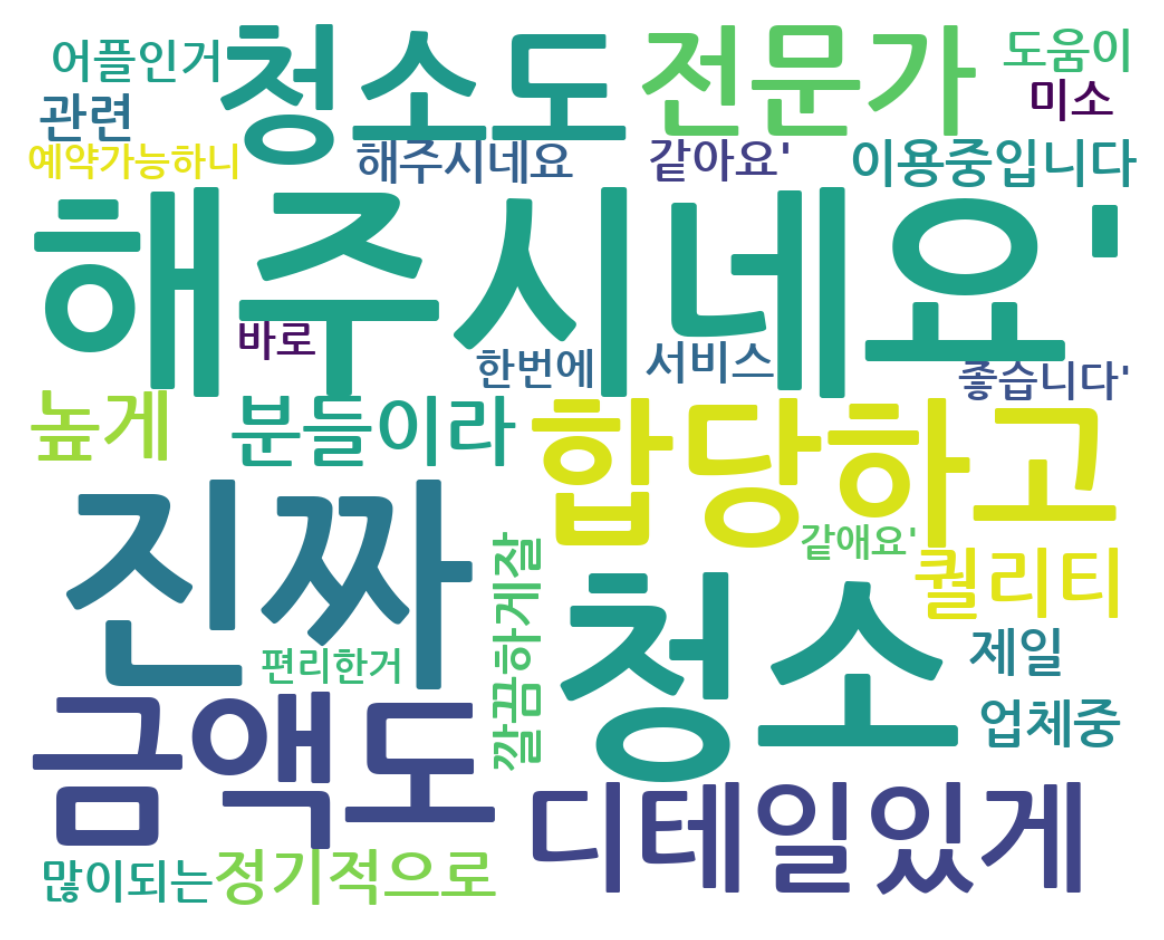

In [106]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(high_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

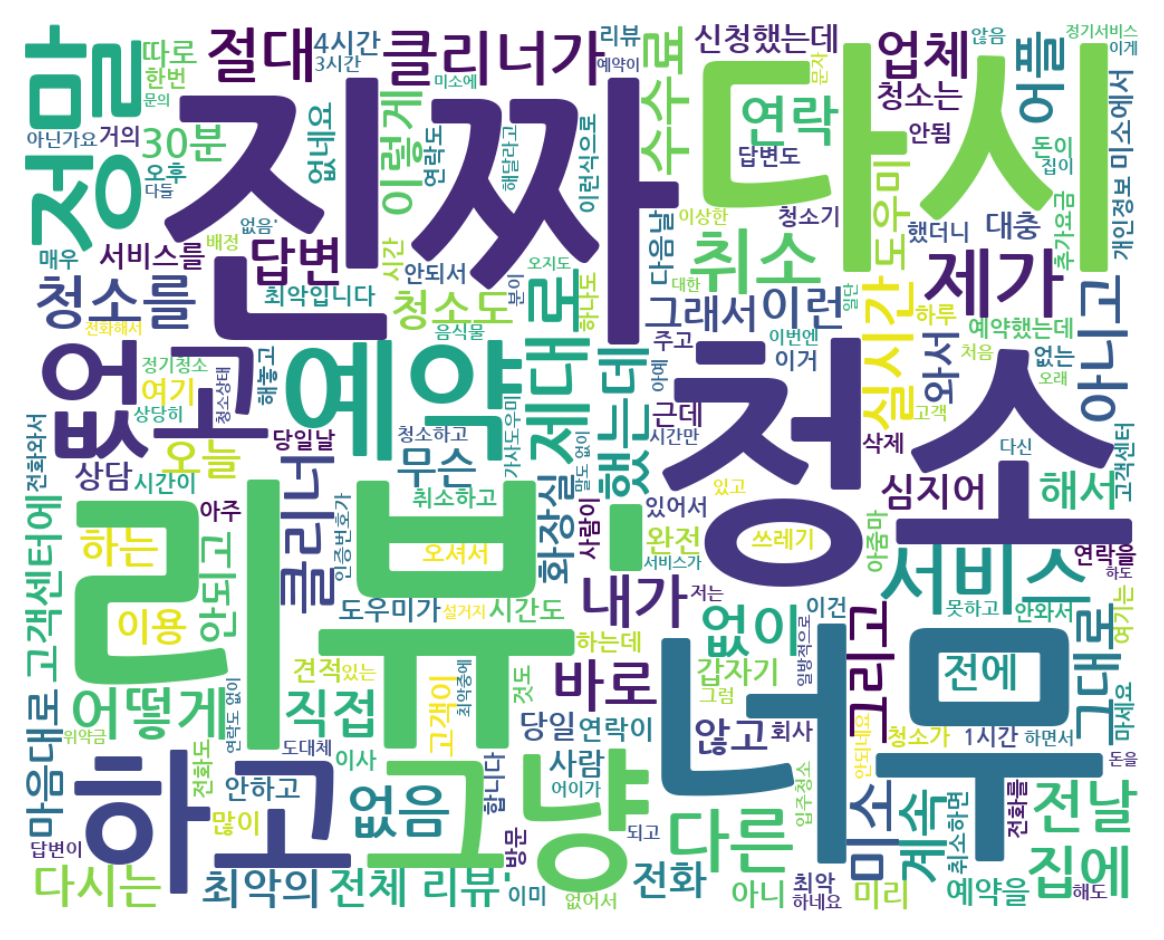

In [107]:
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(low_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 5Ï†êÏùÑ Ï§Ä Í≥†Í∞ùÎì§ÏùÄ qualityÏôÄ Ìï©ÎãπÌïú Í∞ÄÍ≤©Ïóê ÎßåÏ°±ÌñàÍ≥†, 1Ï†êÏùÑ Ï§Ä Í≥†Í∞ùÎì§ÏùÄ ÎåÄÏ∂©, ÏàòÏàòÎ£å, Ï∂îÍ∞ÄÏöîÍ∏à, Í∞úÏù∏Ï†ïÎ≥¥ Îì±Ïóê Ïù¥ÏïºÍ∏∞Ìï®

In [123]:
4737/5200

0.9109615384615385

### Î∂ÑÏÑùÍ≤∞Í≥º

- Ï¥ù Î∂ÑÏÑù Î¶¨Î∑∞: 5200Í±¥(2019.09 ~ 2020.08)
- Í∞ÄÏùÑÏóê(ÌäπÌûà 10Ïõî)Ïóê ÏÑúÎπÑÏä§ ÏÇ¨Ïö©ÎüâÏù¥ ÎßéÏïòÎã§
- Ï£ºÎ°ú ÌèâÏùº(Í≥®Í≥†Î£®)Ïóê ÏÑúÎπÑÏä§Î•º Ïù¥Ïö©ÌïòÍ≥†, Ï£ºÎßêÏóêÎäî ÏÉÅÎåÄÏ†ÅÏùÄ Ï†ÅÍ≤å ÏÑúÎπÑÏä§Î•º ÏÇ¨Ïö©Ìï®
    - Ï£ºÎßêÏóêÎäî ÏßëÏóêÏÑú Ïâ¨Í≥†, ÌèâÏùºÏóê ÏßëÏù¥ Îπà(?) ÏãúÍ∞ÑÏóê ÏÑúÎπÑÏä§Î•º Ïö¥ÏòÅÌïòÎäî Í≤É Í∞ôÏùå
- 5Ï†êÏùÑ Ï§Ä ÏÇ¨ÎûåÎì§ÏùÄ 91%Ïù∏Îç∞ ÎπÑÌï¥ Î¶¨Î∑∞Î•º ÎßéÏù¥ ÎÇ®Í∏∞Îäî Í≤É Í∞ôÏßÑ ÏïäÎã§. ÌïòÏßÄÎßå Í∑∏Ï§ëÏóêÏÑú Ìï©Î¶¨Ï†Å Í∞ÄÍ≤©Í≥º ÌÄÑÎ¶¨Ìã∞Ïóê ÎßåÏ°±Ìïú Í≤É Í∞ôÎã§
- 1Ï†êÏùÑ Ï§Ä ÏÇ¨ÎûåÎì§ÏùÄ Î∂àÎßåÏÇ¨Ìï≠ÏùÑ ÏÉÅÏÑ∏Ìûà Ï†ÅÏùÄ Í≤ÉÍ∞ôÎã§. Ï∂îÍ∞ÄÏöîÍ∏à, ÏàòÏàòÎ£å Îì±Ïóê Î∂àÎßåÏù¥ ÏûàÎäî Í≤É Í∞ôÍ≥† Í≥†Í∞ùÏÑºÌÑ∞Ïùò ÏÑúÎπÑÏä§ÏóêÎèÑ Î∂àÎßåÏù¥ ÏûàÎäî Í≤É Í∞ôÎã§
- Miso ÏÑúÎπÑÏä§ÎèÑ ÏΩîÎ°úÎÇò19 ÏòÅÌñ•ÏùÑ Î∞õÏùÄ Í≤É Í∞ôÍ≥† Î∞úÎ≥ë Ï∂îÏù¥Ïóê Îî∞Îùº Ï¶ùÍ∞êÏùÑ Î≥¥ÏûÑ. 
- ÌòÑÏû¨ ÏûëÎÖÑ 9ÏõîÍ≥º ÎπÑÏä∑Ìïú 500Í±¥ ÎåÄ ÏÑúÎπÑÏä§ Ïù¥Ïö©Î•†Ïù¥ÏßÄÎßå Îã§Ïãú ÏΩîÎ°úÎÇò19 ÌôïÏßÑÏûêÍ∞Ä Í∏âÏÜçÌïòÍ≤å Ï¶ùÍ∞ÄÌïòÎØÄÎ°ú Ïò¨Ìï¥ 9ÏõîÎ∂ÄÌÑ∞ Ïú†ÏùòÍπäÍ≤å ÏßÄÏºúÎ¥êÏïº Ìï† Í≤É Í∞ôÏùå
- ÏΩîÎ°úÎÇò19 Ï†ÑÌååÎ•º Í±±Ï†ïÌïòÎäî Í≥†Í∞ùÎì§ÏùÑ ÏúÑÌï¥ ÏúÑÏÉù Î∞è Î∞©Ïó≠ Îì±Ïùò Ï≤†Ï†ÄÌïú Í¥ÄÎ¶¨Î•º ÏßÑÌñâÌï¥ÏÑú ÌôçÎ≥¥Ìï¥Ïïº Ìï† Í≤É Í∞ôÏùå